## Observations and Insights

## Dependencies and starter code

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

# Study data files

# Read the mouse data and the study results
mouse_metadata = "data/Mouse_metadata.csv"
mouse_meta_df = pd.read_csv(mouse_metadata)

study_results = "data/Study_results.csv"
study_rets_df = pd.read_csv(study_results)

# Combine the data into a single dataset
combo_data_df = pd.merge(mouse_meta_df, study_rets_df, on="Mouse ID")
combo_data_df.dropna
combo_data_df.head()

# combo_data_df = combo_data_df.set_index("Drug Regimen")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment

# combo_data_df.describe()

mean = combo_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combo_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combo_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combo_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combo_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_table_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_table_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [90]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combo_group_df = pd.DataFrame(combo_data_df.groupby(["Drug Regimen"]).count()).reset_index()

treatment_regimen = combo_group_df[["Drug Regimen","Mouse ID"]]

treatment_regimen = treatment_regimen.rename(columns={"Mouse ID": "Count"})

# Index as Labels
treatment_regimen = treatment_regimen.set_index("Drug Regimen")

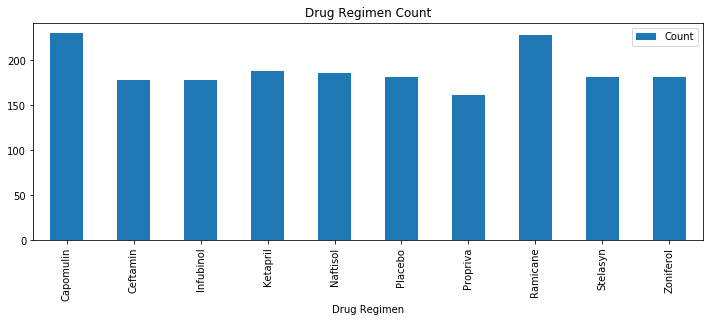

<Figure size 432x288 with 0 Axes>

In [91]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatment_regimen.plot(kind="bar", figsize=(12,4))

# Chart Title
plt.title("Drug Regimen Count")

plt.show()
plt.tight_layout()

## Pie plots

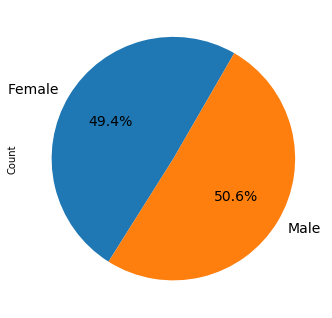

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combo_data_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

# Column Filter
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

# Pandas Pie Plot
plt.figure(figsize=(12,8))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=60, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=14)

([<matplotlib.patches.Wedge at 0x1a20517e10>,
 [Text(-1.0504916785005727, -0.5800579569327962, 'Females'),
  Text(0.9629507052921915, 0.5317197938550634, 'Males')],
 [Text(-0.6127868124586674, -0.33836714154413106, '49.4%'),
  Text(0.5252458392502862, 0.2900289784663982, '50.6%')])

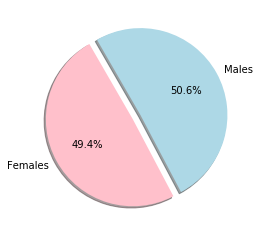

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combo_data_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

# Labels
labels = ["Females", "Males"]

# Colors
colors = ["pink", "lightblue"]

# Format
explode = (0.1, 0)

# PyPlot
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

## Quartiles, outliers and boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Sort data
sort_data_df = combo_data_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Final volume <for each mouse>
max_df = sort_data_df.loc[sort_data_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [95]:
# Capomulin
capomulin_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_df.head().reset_index()

cap_data = capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_data = cap_data["Tumor Volume (mm3)"]
cap_data

quartiles = cap_data.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq-lowerq

print(f"The upper quartile of volumes is: {upperq}")
print(f"The lower quartile of volumes is: {lowerq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Outliers could be found in values above {upper_bound}.")
print(f"Outliers could be found in values below {lower_bound}.")

The upper quartile of volumes is: 40.1592203
The lower quartile of volumes is: 32.37735684
The interquartile range of volumes is: 7.781863460000004
The the median of volumes is: 37.31184577 
Outliers could be found in values above 51.83201549.
Outliers could be found in values below 20.70456164999999.


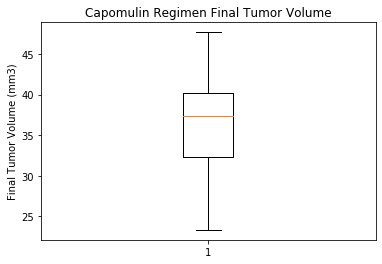

In [96]:
# Capomulin Outlier Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Regimen Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_data)
plt.show()

In [97]:
# Ramicane
ramicane_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_df.head().reset_index()

ram_data = ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_data = ram_data["Tumor Volume (mm3)"]
ram_data

quartiles = ram_data.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq-lowerq

print(f"The upper quartile of volumes is: {upperq}")
print(f"The lower quartile of volumes is: {lowerq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Outliers could be found in values above {upper_bound}.")
print(f"Outliers could be found in values below {lower_bound}.")

The upper quartile of volumes is: 38.508305307499995
The lower quartile of volumes is: 30.981175224999998
The interquartile range of volumes is: 7.527130082499998
The the median of volumes is: 34.848627300000004 
Outliers could be found in values above 49.79900043124999.
Outliers could be found in values below 19.690480101250003.


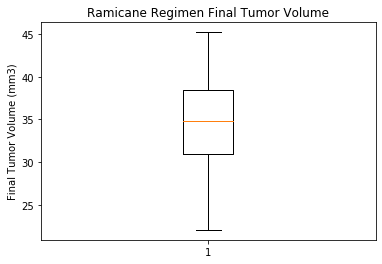

In [98]:
# Ramicane Outlier Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Regimen Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ram_data)
plt.show()

In [99]:
# Infubinol
infubinol_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
infubinol_df.head().reset_index()

inf_data = infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_data = inf_data["Tumor Volume (mm3)"]
inf_data

quartiles = inf_data.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq-lowerq

print(f"The upper quartile of volumes is: {upperq}")
print(f"The lower quartile of volumes is: {lowerq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Outliers could be found in values above {upper_bound}.")
print(f"Outliers could be found in values below {lower_bound}.")

The upper quartile of volumes is: 67.68556862
The lower quartile of volumes is: 62.75445141
The interquartile range of volumes is: 4.9311172099999965
The the median of volumes is: 66.08306589 
Outliers could be found in values above 75.08224443499999.
Outliers could be found in values below 55.35777559500001.


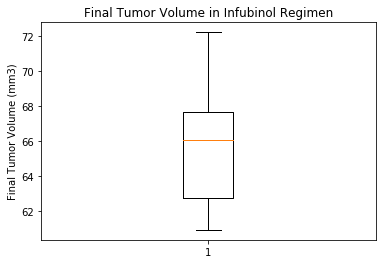

In [100]:
# Infubinol Outlier Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_data)
plt.show()

In [101]:
# Ceftamin
ceftamin_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_df.head().reset_index()

cef_data = ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_data = cef_data["Tumor Volume (mm3)"]
cef_data

quartiles = inf_data.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq-lowerq

print(f"The upper quartile of volumes is: {upperq}")
print(f"The lower quartile of volumes is: {lowerq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Outliers could be found in values above {upper_bound}.")
print(f"Outliers could be found in values below {lower_bound}.")

The upper quartile of volumes is: 67.68556862
The lower quartile of volumes is: 62.75445141
The interquartile range of volumes is: 4.9311172099999965
The the median of volumes is: 66.08306589 
Outliers could be found in values above 75.08224443499999.
Outliers could be found in values below 55.35777559500001.


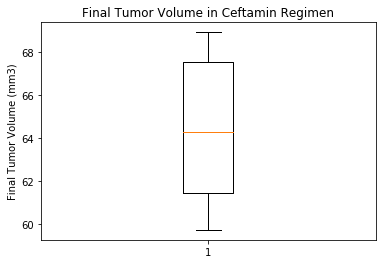

In [102]:
# Ceftamin Outlier Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_data)
plt.show()

In [103]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

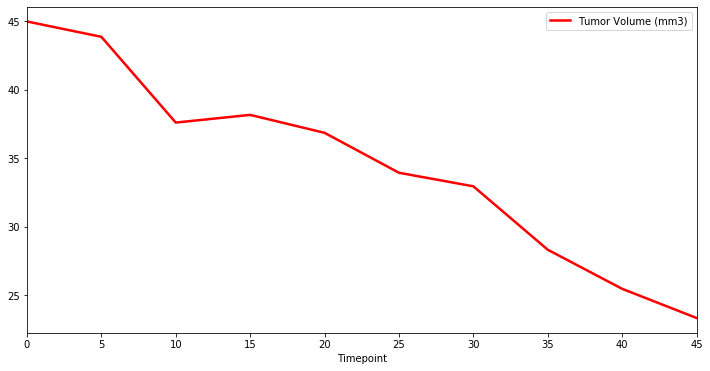

In [104]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
new_cap_df = combo_data_df.loc[combo_data_df["Drug Regimen"] == "Capomulin"]
new_cap_df = new_cap_df.reset_index()
new_cap_df.head()

# One mouse
single_cap_df = new_cap_df.loc[new_cap_df["Mouse ID"] == "s185"]
single_cap_df

# Two columns
single_cap_df = single_cap_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

# Reset index
single_cap_df = single_cap_df.reset_index(drop=True)

# Line plot
single_cap_df.set_index('Timepoint').plot(figsize=(12, 6), linewidth=2.5, color='red')

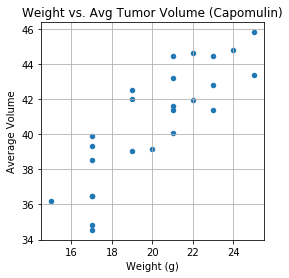

In [119]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
new_cap_df.head()

# Three columns
cap_table_df = new_cap_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_table_df.head()

# Average Tumor Volume in the Capomulin regimen
avg_vol_cap = pd.DataFrame(cap_table_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_vol_cap.head()

avg_vol_cap = avg_vol_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_vol_cap.head()

avg_vol_cap = avg_vol_cap.set_index('Mouse ID')

avg_vol_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight vs. Avg Tumor Volume (Capomulin)")
plt.show()

The correlation between mouse weight & average tumor volume is 0.84


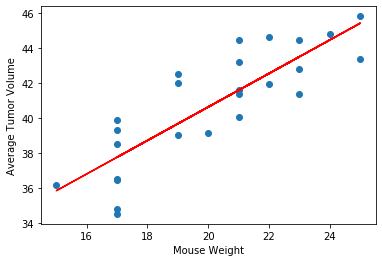

In [136]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from matplotlib import pyplot as plt
from scipy import stats

# Correlation coefficient
mouse_weight = avg_vol_cap.iloc[:,0]
avg_tum_vol = avg_vol_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tum_vol)
print(f"The correlation between mouse weight & average tumor volume is {round(correlation[0],2)}")

# Add linear regression equation & line to plot
x_values = avg_vol_cap['Weight (g)']
y_values = avg_vol_cap['Average Volume']
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()